In [176]:
import pandas as pd
import matplotlib.pyplot as plt
cus = pd.read_json('dim_customer.json')
inv = pd.read_csv('fct_invoice.csv')

cus


,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [11]:
print(inv['customer_id'].nunique())

5191


In [15]:
print(inv['category'].unique())
print(inv['category'].nunique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


In [88]:
pay = inv['payment_method'].value_counts()
print(pay[0])
print(pay.index[0])


44447
Cash


In [186]:
inv['sales'] = inv['quantity']*inv['price']
yes = inv.groupby('category')['sales'].sum()
yes = yes.sort_values(ascending = False)

print(yes.index[0:3].values)

['Clothing' 'Shoes' 'Technology']


In [124]:
no = cus[cus['age']>45]
inv['sales'] = inv['quantity']*inv['price']
wat = pd.merge(no, inv, left_on='id', right_on='customer_id')
wat = wat['sales'].sum()
wat

82039768.14999999

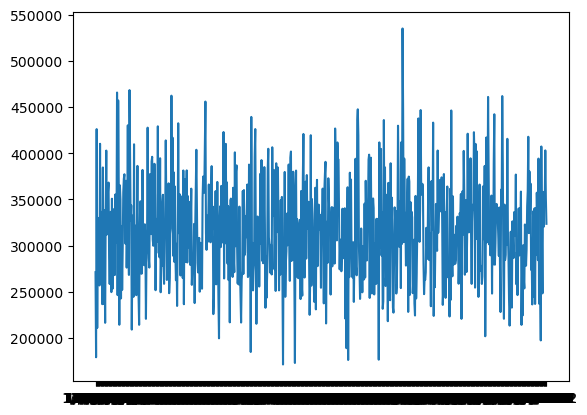

In [188]:
inv['sales'] = inv['quantity']*inv['price']
yes = pd.merge(cus, inv, left_on = 'id', right_on = 'customer_id')
yes = yes.groupby('invoice_date')['sales'].sum()
plt.plot(yes.index, yes.values)


In [195]:
import numpy as py
interval = [0,9,19,29,39,49,59,69,79,89,99]
inv['sales'] = inv['quantity']*inv['price']

yes = pd.merge(cus, inv, left_on = "id", right_on = 'customer_id')
no['age_interval'] = pd.cut(yes['age'], interval)

table = no.pivot_table(index = 'category', columns='age_interval', values = 'sales', aggfunc='sum')

print(table)

no


age_interval     (0, 9]     (9, 19]     (19, 29]     (29, 39]     (39, 49]  \
category                                                                     
Books               0.0    12801.75     79461.75     84143.10     87203.40   
Clothing            0.0  1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics           0.0   109619.36    605915.32    723544.70    665034.96   
Food & Beverage     0.0    13582.31     73491.96     87246.86     89553.29   
Shoes               0.0   993281.35   5924878.24   7200839.66   7025590.02   
Souvenir            0.0    12375.15     54943.32     64092.72     66391.80   
Technology          0.0  1129800.00   5261550.00   6159300.00   5954550.00   
Toys                0.0    60426.24    385100.80    420582.40    390906.88   

age_interval        (49, 59]     (59, 69]    (69, 79]    (79, 89]  (89, 99]  
category                                                                     
Books               74962.20     80476.80    54827.85    26664.

,age,first_name,gender,id,last_name,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,sales,age_interval
0,48.0,Nicholas,M,0,Flores,I254078,0,Shoes,3,1800.51,Cash,28/05/2021,Kanyon,5401.53,"(39.0, 49.0]"
1,48.0,Nicholas,M,0,Flores,I387354,0,Shoes,1,600.17,Cash,7/4/2021,Kanyon,600.17,"(39.0, 49.0]"
2,48.0,Nicholas,M,0,Flores,I170558,0,Cosmetics,2,81.32,Cash,13/02/2021,Metropol AVM,162.64,"(39.0, 49.0]"
3,48.0,Nicholas,M,0,Flores,I187874,0,Books,4,60.60,Cash,21/01/2023,Mall of Istanbul,242.40,"(39.0, 49.0]"
4,48.0,Nicholas,M,0,Flores,I171870,0,Toys,3,107.52,Credit Card,1/8/2022,Istinye Park,322.56,"(39.0, 49.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,NaN,Arthur,M,9428,Harris,I216403,9428,Cosmetics,5,203.30,Debit Card,4/7/2021,Mall of Istanbul,1016.50,NaN
99453,NaN,David,M,9494,Roy,I203211,9494,Cosmetics,1,40.66,Debit Card,9/7/2022,Metrocity,40.66,NaN
99454,85.0,Thomas,M,10350,Turner,I325731,10350,Cosmetics,2,81.32,Cash,7/4/2021,Cevahir AVM,162.64,"(79.0, 89.0]"
99455,NaN,April,F,10587,Sanchez,I478078,10587,Clothing,5,1500.40,Credit Card,20/10/2022,Metrocity,7502.00,NaN


In [210]:
bins = [0,9,19,29,39,49,59,69,79,89,99]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
age_range = pd.cut(yes['age'],bins=bins, right = True)
age_range
table = yes.pivot_table(index = 'category', values = 'sales', columns = age_range, aggfunc = 'sum')

print(yes['sales'].sum())

print(table.values.sum())

print(table)

251505794.25
149858361.14
age              (0, 9]     (9, 19]     (19, 29]     (29, 39]     (39, 49]  \
category                                                                     
Books               0.0    12801.75     79461.75     84143.10     87203.40   
Clothing            0.0  1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics           0.0   109619.36    605915.32    723544.70    665034.96   
Food & Beverage     0.0    13582.31     73491.96     87246.86     89553.29   
Shoes               0.0   993281.35   5924878.24   7200839.66   7025590.02   
Souvenir            0.0    12375.15     54943.32     64092.72     66391.80   
Technology          0.0  1129800.00   5261550.00   6159300.00   5954550.00   
Toys                0.0    60426.24    385100.80    420582.40    390906.88   

age                 (49, 59]     (59, 69]    (69, 79]    (79, 89]  (89, 99]  
category                                                                     
Books               74962.20     8047